In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import zscore
import sklearn
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
!pip install xgboost

In [ ]:
!pip install imbalanced-learn

In [ ]:
!pip install eli5

In [ ]:
import imblearn

from xgboost import XGBClassifier
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import TomekLinks
from imblearn.combine import SMOTETomek

In [ ]:
from sklearn.tree import DecisionTreeClassifier

from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.utils import shuffle
import eli5
from eli5.sklearn import PermutationImportance
import missingno as msno 

## EDA

In [ ]:
df = pd.read_excel('/content/dataset.xlsx')
df

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Mycoplasma pneumoniae,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,...,Urine - Esterase,Urine - Aspect,Urine - pH,Urine - Hemoglobin,Urine - Bile pigments,Urine - Ketone Bodies,Urine - Nitrite,Urine - Density,Urine - Urobilinogen,Urine - Protein,Urine - Sugar,Urine - Leukocytes,Urine - Crystals,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Urine - Color,Partial thromboplastin time (PTT),Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,"Prothrombin time (PT), Activity",Vitamin B12,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,D-Dimer,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.022340,-0.517413,0.010677,0.102004,0.318366,-0.950790,-0.094610,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,-0.140648,not_detected,not_detected,not_detected,not_detected,not_detected,detected,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,-0.619086,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,detected,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [ ]:
df.describe()

,Patient age quantile,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Mycoplasma pneumoniae,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,Alanine transaminase,Aspartate transaminase,Gamma-glutamyltransferase,Total Bilirubin,Direct Bilirubin,Indirect Bilirubin,Alkaline phosphatase,Ionized calcium,Magnesium,pCO2 (venous blood gas analysis),Hb saturation (venous blood gas analysis),Base excess (venous blood gas analysis),pO2 (venous blood gas analysis),Fio2 (venous blood gas analysis),Total CO2 (venous blood gas analysis),pH (venous blood gas analysis),HCO3 (venous blood gas analysis),Rods #,Segmented,Promyelocytes,Metamyelocytes,Myelocytes,Myeloblasts,Urine - Density,Urine - Sugar,Urine - Red blood cells,Partial thromboplastin time (PTT),Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,"Prothrombin time (PT), Activity",Vitamin B12,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,D-Dimer,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
count,5644.000000,5644.000000,5644.000000,5644.000000,6.030000e+02,6.030000e+02,6.020000e+02,5.990000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.010000e+02,6.020000e+02,2.080000e+02,0.0,5.130000e+02,3.970000e+02,5.060000e+02,4.240000e+02,3.710000e+02,3.700000e+02,2.250000e+02,2.260000e+02,1.530000e+02,1.820000e+02,1.820000e+02,1.820000e+02,1.440000e+02,5.000000e+01,4.000000e+01,1.360000e+02,1.360000e+02,1.360000e+02,1.360000e+02,1.0,1.360000e+02,1.360000e+02,1.360000e+02,9.700000e+01,9.700000e+01,9.700000e+01,9.700000e+01,9.700000e+01,97.0,7.000000e+01,0.0,7.000000e+01,0.0,9.100000e+01,1.330000e+02,1.010000e+02,0.0,3.000000e+00,1.040000e+02,2.300000e+01,2.700000e+01,8.000000e+00,0.0,1.300000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.000000e+01,2.000000e+01,2.700000e+01
mean,9.318391,0.013997,0.008859,0.007264,-2.186214e-09,-1.601319e-08,-3.535004e-10,7.438142e-09,8.424447e-09,-7.866736e-09,1.014863e-09,6.215833e-09,-6.633740e-09,-3.453010e-09,7.206147e-09,-4.155369e-09,-3.220114e-09,1.020433e-08,7.069992e-09,NaN,5.908361e-09,-6.675260e-09,2.779703e-09,-6.679604e-09,2.038366e-08,1.123628e-08,2.719462e-09,-5.439583e-10,-1.479159e-09,-2.783733e-09,1.205602e-08,3.029357e-09,-2.037268e-09,1.907349e-08,-5.215406e-09,-1.935234e-08,1.509290e-08,-1.075130e-09,-7.909394e-09,0.0,-9.121483e-09,3.593467e-09,-4.416934e-09,2.611544e-09,-2.678753e-08,7.373770e-09,8.602732e-09,1.382582e-08,0.0,-2.554485e-09,NaN,7.557017e-09,NaN,-9.824941e-10,-4.733640e-09,1.733551e-09,NaN,-1.986821e-08,-6.483438e-09,7.288611e-09,-1.655685e-09,-3.725290e-09,NaN,-5.731216e-09,-1.379737e-10,8.416397e-09,-1.655685e-09,4.139211e-10,-7.472139e-09,6.070843e-09,-2.469729e-08,4.656613e-09,6.332993e-09,5.243001e-09
std,5.777903,0.117489,0.093713,0.084929,1.000830e+00,1.000830e+00,1.000832e+00,1.000836e+00,1.000832e+00,1.000832e+00,1.000832e+00,1.000832e+00,1.000832e+00,1.000832e+00,1.000832e+00,1.000832e+00,1.000833e+00,1.000832e+00,1.002413e+00,NaN,1.000976e+00,1.001262e+00,1.000990e+00,1.001181e+00,1.001350e+00,1.001354e+00,1.002230e+00,1.002220e+00,1.003284e+00,1.002759e+00,1.002759e+00,1.002759e+00,1.003490e+00,1.010153e+00,1.012739e+00,1.003697e+00,1.003697e+00,1.0036

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Columns: 111 entries, Patient ID to ctO2 (arterial blood gas analysis)
dtypes: float64(70), int64(4), object(37)
memory usage: 4.8+ MB


In [ ]:
df.dtypes

Patient ID                                                object
Patient age quantile                                       int64
SARS-Cov-2 exam result                                    object
Patient addmited to regular ward (1=yes, 0=no)             int64
Patient addmited to semi-intensive unit (1=yes, 0=no)      int64
                                                          ...   
HCO3 (arterial blood gas analysis)                       float64
pO2 (arterial blood gas analysis)                        float64
Arteiral Fio2                                            float64
Phosphor                                                 float64
ctO2 (arterial blood gas analysis)                       float64
Length: 111, dtype: object

## Data Cleaning

In [ ]:
df_null_pct = df.isna().mean().round(4) * 100

df_null_pct.sort_values(ascending=False)

Prothrombin time (PT), Activity                          100.0
D-Dimer                                                  100.0
Mycoplasma pneumoniae                                    100.0
Urine - Sugar                                            100.0
Partial thromboplastin time (PTT)                        100.0
                                                         ...  
Patient addmited to semi-intensive unit (1=yes, 0=no)      0.0
Patient addmited to regular ward (1=yes, 0=no)             0.0
SARS-Cov-2 exam result                                     0.0
Patient age quantile                                       0.0
Patient ID                                                 0.0
Length: 111, dtype: float64

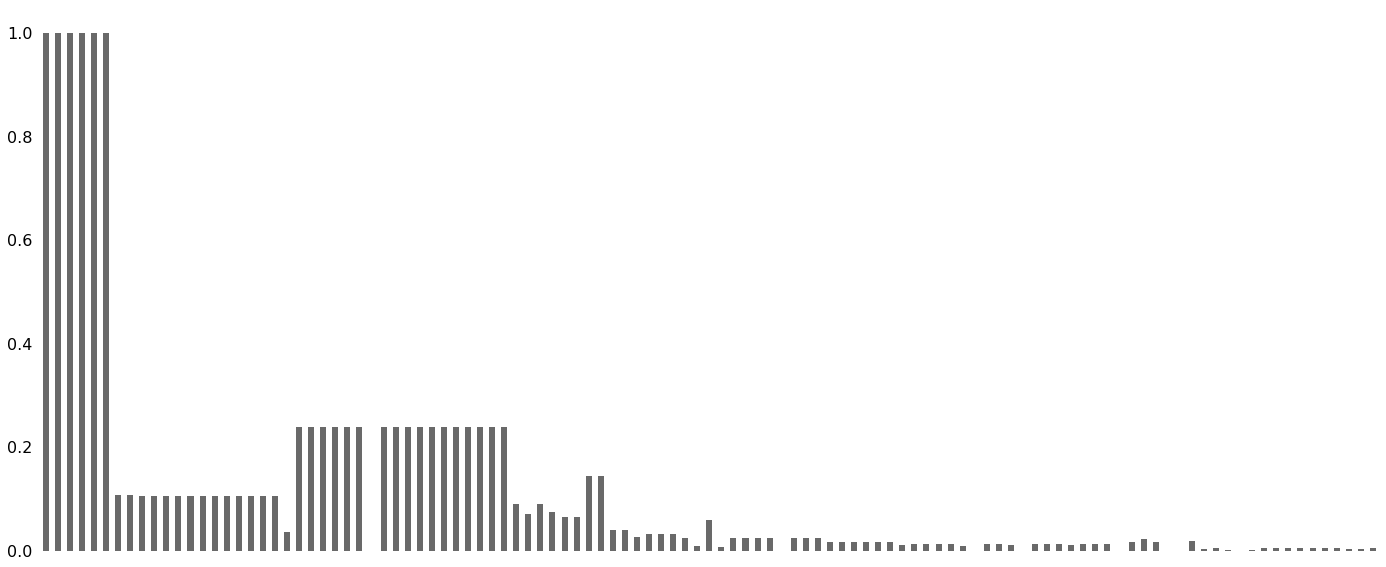

In [ ]:
msno.bar(df)

In [ ]:
print(df.isnull)

<bound method DataFrame.isnull of            Patient ID  ...  ctO2 (arterial blood gas analysis)
0     44477f75e8169d2  ...                                 NaN
1     126e9dd13932f68  ...                                 NaN
2     a46b4402a0e5696  ...                                 NaN
3     f7d619a94f97c45  ...                                 NaN
4     d9e41465789c2b5  ...                                 NaN
...               ...  ...                                 ...
5639  ae66feb9e4dc3a0  ...                                 NaN
5640  517c2834024f3ea  ...                                 NaN
5641  5c57d6037fe266d  ...                                 NaN
5642  c20c44766f28291  ...                                 NaN
5643  2697fdccbfeb7f7  ...                                 NaN

[5644 rows x 111 columns]>


In [ ]:
columns = ['Patient age quantile', 'SARS-Cov-2 exam result','Patient addmited to regular ward (1=yes, 0=no)',
           'Patient addmited to semi-intensive unit (1=yes, 0=no)', 'Patient addmited to intensive care unit (1=yes, 0=no)',
           'Hematocrit', 'Hemoglobin', 'Platelets', 'Mean platelet volume ', 'Red blood Cells', 'Lymphocytes',
           'Leukocytes', 'Basophils', 'Mean corpuscular hemoglobin (MCH)', 'Eosinophils', 'Mean corpuscular volume (MCV)',
           'Monocytes', 'Red blood cell distribution width (RDW)', 'Serum Glucose', 'Respiratory Syncytial Virus', 'Influenza A', 'Influenza B', 'Parainfluenza 1', 
           'CoronavirusNL63', 'Rhinovirus/Enterovirus','Coronavirus HKU1', 'Parainfluenza 3', 'Chlamydophila pneumoniae', 'Adenovirus', 'Parainfluenza 4', 'Coronavirus229E', 'CoronavirusOC43' ,
           'Inf A H1N1 2009', 'Bordetella pertussis', 'Metapneumovirus', 'Parainfluenza 2']

In [ ]:
df=df[columns]

In [ ]:
df_new = df.dropna(subset=['Hematocrit'])
df_new = df_new.fillna(-9)

In [ ]:
from sklearn.preprocessing import LabelEncoder
for col in df_new.columns:
  if df_new[col].dtype=='object':
    lbl = LabelEncoder()
    lbl.fit(list(df_new[col].values))
    df_new[col] = lbl.transform(list(df_new[col].values))

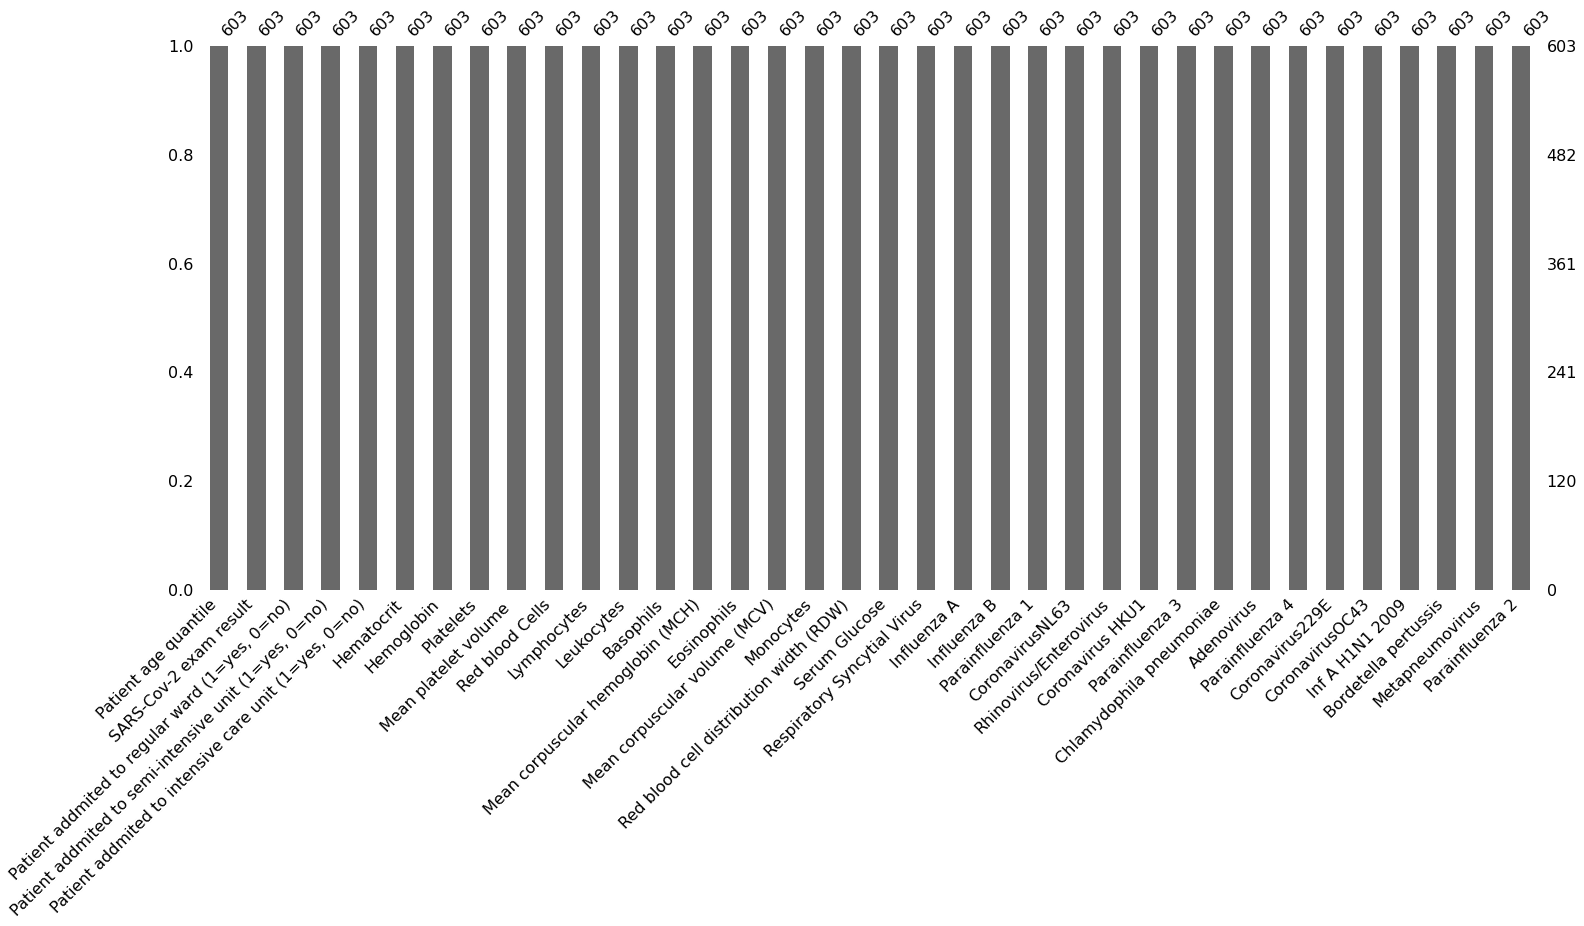

In [ ]:
msno.bar(df_new)

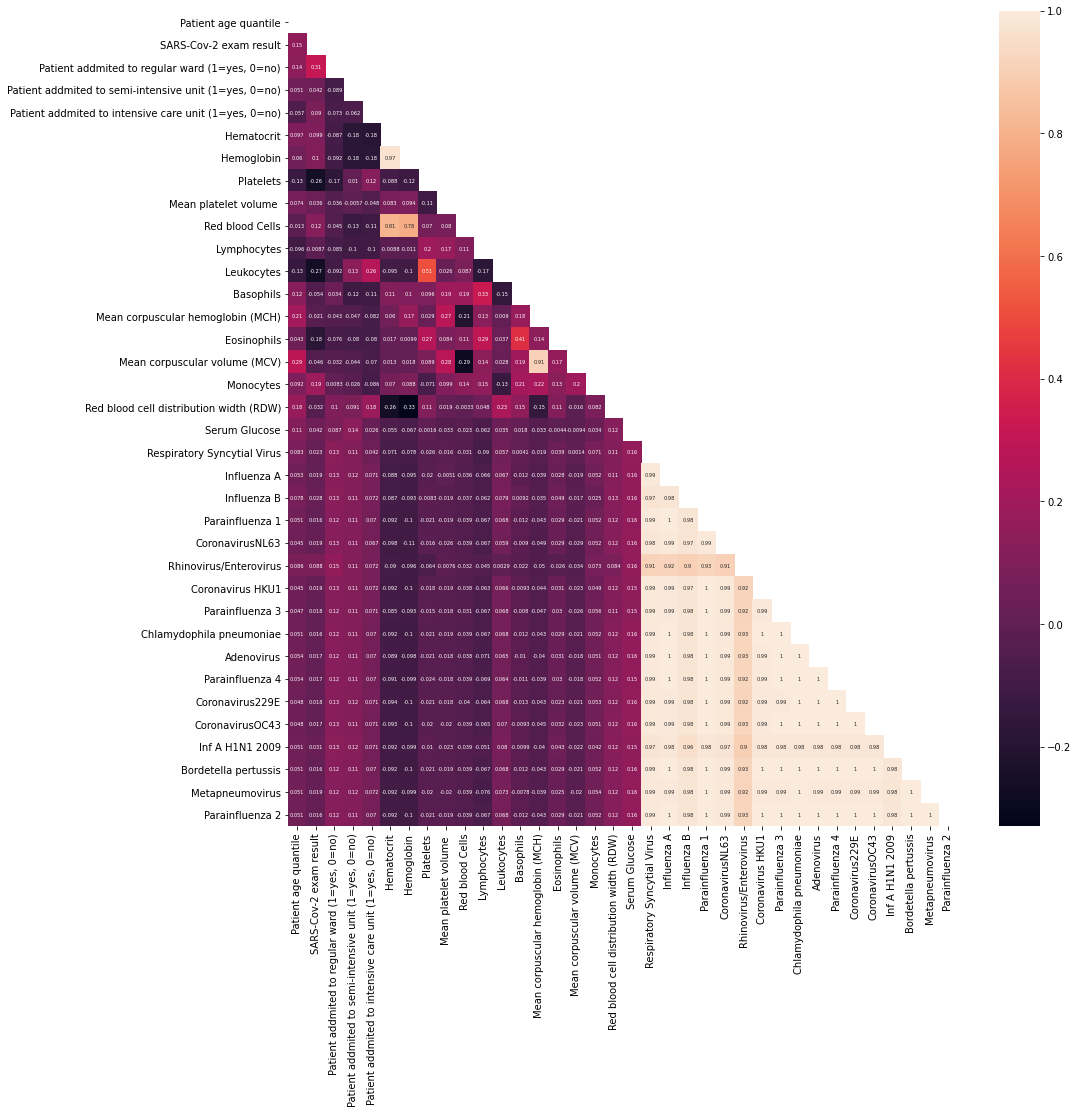

In [ ]:
matrix = np.triu(df_new.corr())
plt.figure(figsize=(15,15))
sns.heatmap(df_new.corr(), mask=matrix, annot=True, annot_kws={'size': 5})

In [ ]:
df_new = df_new.rename({"SARS-Cov-2 exam result":"result"}, axis='columns')
  
df_new

,Patient age quantile,result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2
1,17,0,0,0,0,0.236515,-0.022340,-0.517413,0.010677,0.102004,0.318366,-0.094610,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,-0.140648,2,2,2,1,2,1,2,2,1,2,2,2,2,2,1,2,1
8,1,0,0,1,0,-1.571682,-0.774212,1.429667,-1.672222,-0.850035,-0.005738,0.364550,-0.223767,0.178175,1.018625,-1.336024,0.068652,-0.978899,-0.413208,2,2,2,1,2,2,2,2,1,2,2,2,2,2,1,2,1
15,9,0,0,0,0,-0.747693,-0.586244,-0.429480,-0.213711,-1.361315,-1.114514,-0.884923,0.081693,1.746323,-0.666950,1.668409,1.276759,-1.067355,-9.000000,2,2,2,1,2,2,2,2,1,2,2,2,2,1,1,2,1
18,11,0,0,0,0,0.991838,0.792188,0.072992,-0.550290,0.542763,0.045436,-0.211488,-0.834685,0.334989,-0.709090,0.606842,-0.220244,0.171035,-9.000000,2,2,2,1,2,1,2,2,1,2,2,2,2,2,1,2,1
22,9,0,0,0,0,0.190738,-0.147652,-0.668155,1.020415,-0.127191,0.002791,-1.132592,0.387152,-0.083183,-0.709090,0.566783,2.012129,0.613318,-0.837191,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5602,19,0,0,0,0,0.190738,0.165628,-0.102873,0.908221,0.384090,-1.583611,-0.328365,-0.834685,-0.449085,0.892207,-0.474754,1.066653,0.347948,2.433532,2,2,2,1,2,2,2,2,1,2,2,2,2,2,1,2,1
5614,19,0,0,0,0,-0.289922,-0.523588,0.663397,-0.774677,0.754327,-1.532437,1.569499,0.081693,-2.174047,-0.540532,-1.976971,1.670707,0.967144,0.253050,2,2,2,1,2,2,2,2,1,2,2,2,2,2,1,2,1
5615,15,0,0,0,0,0.717175,1.105468,-0.492289,-0.213711,0.613284,0.002791,-0.550988,-0.223767,0.700891,-0.709090,0.005955,0.909074,-1.155812,-9.000000,2,2,2,1,2,2,2,2,1,2,2,2,2,2,1,2,1
5618,17,0,0,0,0,-3.242548,-2.779203,-1.773594,-0.550290,-3.318285,-1.830953,-1.733675,-1.140144,2.059952,-0.582671,1.408024,1.381812,-0.448160,0.041059,2,2,2,1,2,2,2,2,1,2,2,2,2,2,1,2,1


In [ ]:
df_new["result"]

1       0
8       0
15      0
18      0
22      0
       ..
5602    0
5614    0
5615    0
5618    0
5643    1
Name: result, Length: 603, dtype: int64

Negative: 86.24 % of the dataset
Positive: 13.76 % of the dataset


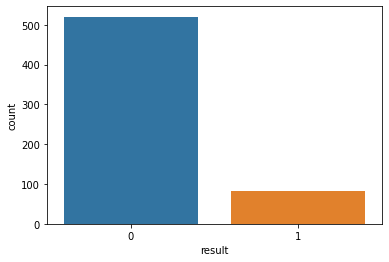

In [ ]:
print('Negative:', round(
        df_new['result'].value_counts()[0]/len(df_new)*100, 2), '% of the dataset')
print('Positive:', round(
        df_new['result'].value_counts()[1]/len(df_new)*100, 2), '% of the dataset')
sns.countplot('result',data=df_new)

## XG-Boost

In [ ]:
#spearting data
X= df_new.drop(columns='result')
Y=df_new['result']

In [ ]:
X.shape, Y.shape

((603, 35), (603,))

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 100)
X_train.shape, X_test.shape

((452, 35), (151, 35))

In [ ]:
clf = XGBClassifier()
clf.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
training_preds = clf.predict(X_train)
test_preds = clf.predict(X_test)

training_accuracy = accuracy_score(Y_train, training_preds)
test_accuracy = accuracy_score(Y_test, test_preds)

print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))

Training Accuracy: 99.12%
Validation accuracy: 87.42%


In [ ]:
print('True:', Y_test.values[0:10])
print('Pred:', test_preds[0:10])

True: [1 0 0 0 0 0 1 0 1 0]
Pred: [1 0 0 0 0 1 0 0 0 0]


In [ ]:
print(metrics.confusion_matrix(Y_test, test_preds))

[[125   3]
 [ 16   7]]


In [ ]:
print(metrics.recall_score(Y_test, test_preds))

0.30434782608695654


In [ ]:
# recall score is very low, due to class imbalance

## K Fold cv

In [ ]:
from sklearn.model_selection import cross_val_score
clf = XGBClassifier()
print(cross_val_score(clf,X,Y,cv=10,scoring='accuracy').mean())

0.8857103825136612


## stratified K Fold cv

In [ ]:
from sklearn.model_selection import StratifiedKFold

In [ ]:
accuracy=[]
skf = StratifiedKFold(n_splits=10, random_state=None)
skf.get_n_splits(X,Y)
# X is feature set Y is target set
for train_index, test_index in skf.split(X,Y):

  print("Train:", train_index, "Validation:", test_index)
  X1_train, X1_test = X.iloc[train_index], X.iloc[test_index]
  y1_train, y1_test = Y.iloc[train_index], Y.iloc[test_index]
  
  clf.fit(X1_train,y1_train)
  prediction=clf.predict(X1_test)
  score=accuracy_score(prediction,y1_test)
  accuracy.append(score)
print(accuracy)

Train: [ 52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69
  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87
  88  89  90  91  92  93  94  95  96  98  99 100 101 102 103 104 105 106
 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124
 125 126 127 128 129 130 131 132 133 134 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 166 167 169 170 171 172 173 174 175 176 177 178 179 180 181
 182 183 184 186 187 188 189 190 191 192 193 194 195 196 198 199 200 201
 202 203 204 205 208 209 210 211 212 213 214 215 216 217 218 219 220 221
 222 223 224 225 226 227 228 229 230 231 232 233 235 236 237 238 239 240
 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258
 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276
 277 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294
 295 296 297 298 299 300 301 302 303 304 305

In [ ]:
np.array(accuracy).mean()

0.8857103825136612

## Split the data based on binary information in last column

In [ ]:
df_negative = df_new[df_new['result'] == 0]
df_positive = df_new[df_new['result'] == 1]

In [ ]:
df_positive.head()

,Patient age quantile,result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2
568,2,1,0,0,0,0.991838,0.792188,-0.341548,1.469188,1.653476,-0.048383,-0.420197,1.303529,-1.442245,-0.498393,-1.396114,1.933339,0.967144,-9.000000,2,2,2,1,2,2,2,2,1,2,2,2,2,2,1,2,1
884,15,1,1,0,0,-0.495919,-0.398276,-0.718402,-0.438097,-0.567950,-0.935404,-0.820919,-1.140144,0.334989,-0.666950,0.226280,-0.456613,-0.978899,-0.928044,2,2,2,1,2,2,2,2,1,2,2,2,2,2,1,2,1
1108,14,1,0,0,0,-0.312811,-0.648900,-0.027502,-0.101517,-0.656101,-0.099557,-0.968407,-0.529226,0.021361,0.175837,0.807138,1.513128,0.347948,-0.110364,2,2,2,1,2,2,2,2,1,2,2,2,2,2,1,2,1
1162,14,1,0,0,0,-0.518807,-0.272964,-0.215930,0.459449,-0.515058,-0.457777,-0.573250,-0.223767,0.439533,-0.709090,0.066045,2.537393,-0.801985,-0.292070,2,2,2,1,2,2,2,2,1,2,2,2,2,2,1,2,1
1293,7,1,0,0,0,0.694287,0.729532,-0.743526,0.235063,0.595655,-0.636887,-0.606644,-0.223767,0.125903,-0.119138,-0.014074,0.882811,-0.713529,-9.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_negative.head()

,Patient age quantile,result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2
1,17,0,0,0,0,0.236515,-0.022340,-0.517413,0.010677,0.102004,0.318366,-0.094610,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,-0.140648,2,2,2,1,2,1,2,2,1,2,2,2,2,2,1,2,1
8,1,0,0,1,0,-1.571682,-0.774212,1.429667,-1.672222,-0.850035,-0.005738,0.364550,-0.223767,0.178175,1.018625,-1.336024,0.068652,-0.978899,-0.413208,2,2,2,1,2,2,2,2,1,2,2,2,2,2,1,2,1
15,9,0,0,0,0,-0.747693,-0.586244,-0.429480,-0.213711,-1.361315,-1.114514,-0.884923,0.081693,1.746323,-0.666950,1.668409,1.276759,-1.067355,-9.000000,2,2,2,1,2,2,2,2,1,2,2,2,2,1,1,2,1
18,11,0,0,0,0,0.991838,0.792188,0.072992,-0.550290,0.542763,0.045436,-0.211488,-0.834685,0.334989,-0.709090,0.606842,-0.220244,0.171035,-9.000000,2,2,2,1,2,1,2,2,1,2,2,2,2,2,1,2,1
22,9,0,0,0,0,0.190738,-0.147652,-0.668155,1.020415,-0.127191,0.002791,-1.132592,0.387152,-0.083183,-0.709090,0.566783,2.012129,0.613318,-0.837191,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


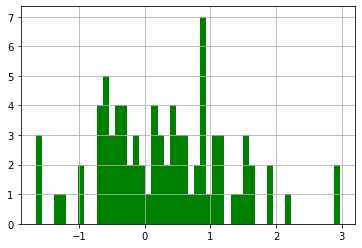

In [ ]:

plot_covid_positive= df_positive['Red blood Cells'].hist(bins = 50, color='green')

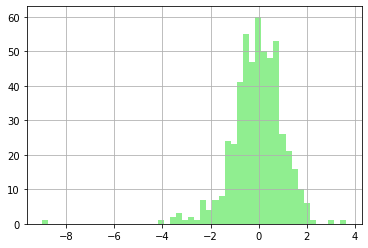

In [ ]:
plot_covid_negative= df_negative['Red blood Cells'].hist(bins = 50, color='lightgreen')

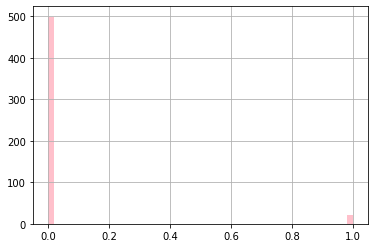

In [ ]:
plot_covid_negative= df_negative['Patient addmited to intensive care unit (1=yes, 0=no)'].hist(bins = 50, color='pink')

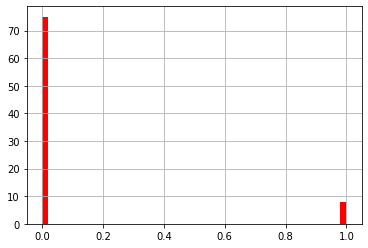

In [ ]:
plot_covid_positive= df_positive['Patient addmited to intensive care unit (1=yes, 0=no)'].hist(bins = 50, color='red')

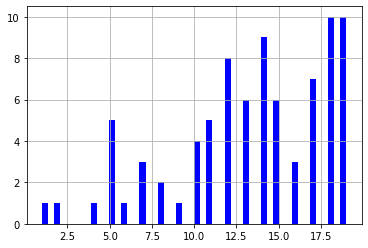

In [ ]:
plot_covid_positive= df_positive['Patient age quantile'].hist(bins = 50, color='blue')

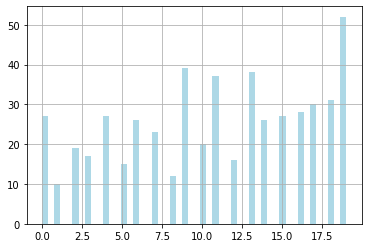

In [ ]:
plot_covid_negative= df_negative['Patient age quantile'].hist(bins = 50, color='lightblue')

## Random Undersampling

In [ ]:
count_class_negative,count_class_positive = df_new.result.value_counts()

Random under-sampling:
1    83
0    83
Name: result, dtype: int64


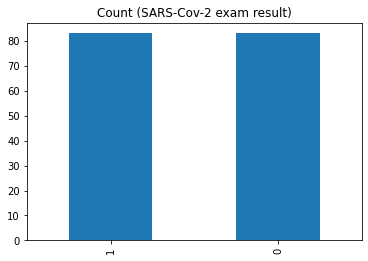

In [ ]:
df_negative_under = df_negative.sample(count_class_positive)
df_test_under = pd.concat([df_negative_under, df_positive], axis=0)

print('Random under-sampling:')
print(df_test_under.result.value_counts())
df_test_under.result.value_counts().plot(kind='bar', title='Count (SARS-Cov-2 exam result)')

## Random Over-Sampling

Random over-sampling:
1    520
0    520
Name: result, dtype: int64


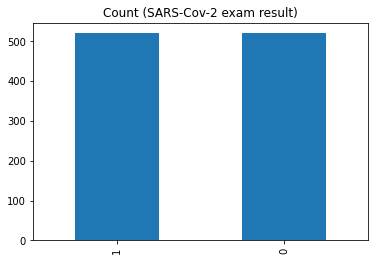

In [ ]:
df_positive_over = df_positive.sample(count_class_negative, replace=True)
df_test_over = pd.concat([df_negative, df_positive_over], axis=0)

print('Random over-sampling:')
print(df_test_over.result.value_counts())

df_test_over.result.value_counts().plot(kind='bar', title="Count (SARS-Cov-2 exam result)")

In [ ]:
df_test_over.result.value_counts()

1    520
0    520
Name: result, dtype: int64

## XG-Boost with Random undersampling

In [ ]:
Xsu = df_test_under[['Patient age quantile', 'Patient addmited to regular ward (1=yes, 0=no)',
           'Patient addmited to semi-intensive unit (1=yes, 0=no)', 'Patient addmited to intensive care unit (1=yes, 0=no)',
           'Hematocrit', 'Hemoglobin', 'Platelets', 'Mean platelet volume ', 'Red blood Cells', 'Lymphocytes',
           'Leukocytes', 'Basophils', 'Mean corpuscular hemoglobin (MCH)', 'Eosinophils', 'Mean corpuscular volume (MCV)',
           'Monocytes', 'Red blood cell distribution width (RDW)', 'Serum Glucose', 'Respiratory Syncytial Virus', 'Influenza A', 'Influenza B', 'Parainfluenza 1', 
           'CoronavirusNL63', 'Rhinovirus/Enterovirus','Coronavirus HKU1', 'Parainfluenza 3', 'Chlamydophila pneumoniae', 'Adenovirus', 'Parainfluenza 4', 'Coronavirus229E', 'CoronavirusOC43' ,
           'Inf A H1N1 2009', 'Bordetella pertussis', 'Metapneumovirus', 'Parainfluenza 2']]
ysu = df_test_under['result']

In [ ]:
X_train_su, X_test_su, y_train_su, y_test_su = train_test_split(Xsu, ysu, random_state=100)

In [ ]:
clf = XGBClassifier()
clf.fit(Xsu, ysu)

training_preds = clf.predict(X_train_su)
test_preds = clf.predict(X_test_su)

training_accuracy = accuracy_score(y_train_su, training_preds)
test_accuracy = accuracy_score(y_test_su, test_preds)

print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))

Training Accuracy: 100.0%
Validation accuracy: 100.0%


In [ ]:
print('True:', y_test_su.values[0:10])
print('Pred:', test_preds[0:10])

True: [1 0 1 1 0 1 0 0 0 0]
Pred: [1 0 1 1 0 1 0 0 0 0]


##  XG-Boost with Random Oversampling

In [ ]:
df_test_over.head()

,Patient age quantile,result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2
1,17,0,0,0,0,0.236515,-0.022340,-0.517413,0.010677,0.102004,0.318366,-0.094610,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,-0.140648,2,2,2,1,2,1,2,2,1,2,2,2,2,2,1,2,1
8,1,0,0,1,0,-1.571682,-0.774212,1.429667,-1.672222,-0.850035,-0.005738,0.364550,-0.223767,0.178175,1.018625,-1.336024,0.068652,-0.978899,-0.413208,2,2,2,1,2,2,2,2,1,2,2,2,2,2,1,2,1
15,9,0,0,0,0,-0.747693,-0.586244,-0.429480,-0.213711,-1.361315,-1.114514,-0.884923,0.081693,1.746323,-0.666950,1.668409,1.276759,-1.067355,-9.000000,2,2,2,1,2,2,2,2,1,2,2,2,2,1,1,2,1
18,11,0,0,0,0,0.991838,0.792188,0.072992,-0.550290,0.542763,0.045436,-0.211488,-0.834685,0.334989,-0.709090,0.606842,-0.220244,0.171035,-9.000000,2,2,2,1,2,1,2,2,1,2,2,2,2,2,1,2,1
22,9,0,0,0,0,0.190738,-0.147652,-0.668155,1.020415,-0.127191,0.002791,-1.132592,0.387152,-0.083183,-0.709090,0.566783,2.012129,0.613318,-0.837191,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
Xso = df_test_over[['Patient age quantile', 'Patient addmited to regular ward (1=yes, 0=no)',
           'Patient addmited to semi-intensive unit (1=yes, 0=no)', 'Patient addmited to intensive care unit (1=yes, 0=no)',
           'Hematocrit', 'Hemoglobin', 'Platelets', 'Mean platelet volume ', 'Red blood Cells', 'Lymphocytes',
           'Leukocytes', 'Basophils', 'Mean corpuscular hemoglobin (MCH)', 'Eosinophils', 'Mean corpuscular volume (MCV)',
           'Monocytes', 'Red blood cell distribution width (RDW)', 'Serum Glucose', 'Respiratory Syncytial Virus', 'Influenza A', 'Influenza B', 'Parainfluenza 1', 
           'CoronavirusNL63', 'Rhinovirus/Enterovirus','Coronavirus HKU1', 'Parainfluenza 3', 'Chlamydophila pneumoniae', 'Adenovirus', 'Parainfluenza 4', 'Coronavirus229E', 'CoronavirusOC43' ,
           'Inf A H1N1 2009', 'Bordetella pertussis', 'Metapneumovirus', 'Parainfluenza 2']]
yso = df_test_over['result']

In [ ]:
X_train_so, X_test_so, y_train_so, y_test_so = train_test_split(Xso, yso, random_state=42)

In [ ]:
clf = XGBClassifier()
clf.fit(Xso, yso)

training_preds = clf.predict(X_train_so)
test_preds = clf.predict(X_test_so)

training_accuracy = accuracy_score(y_train_so, training_preds)
test_accuracy = accuracy_score(y_test_so, test_preds)

print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))

Training Accuracy: 98.21%
Validation accuracy: 97.31%


In [ ]:
print('True:     ', y_test_so.values[0:25])
print('Predicted:', test_preds[0:25])

True:      [0 1 0 0 1 1 0 0 0 0 1 1 1 1 0 0 1 1 0 1 1 1 0 1 1]
Predicted: [0 1 0 0 1 1 0 0 0 0 1 1 1 1 0 0 1 1 0 1 1 1 0 1 1]


## SMOTE and Tomek links

## XG-Boost with SMOTE, no additional tomek




In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42)

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_sample(X_train, y_train)

In [ ]:
X_train = X_train.values
X_test = X_test.values

In [ ]:
clf = XGBClassifier()
clf.fit(X_sm, y_sm)

training_preds = clf.predict(X_train)
test_preds = clf.predict(X_test)

training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))

Training Accuracy: 98.45%
Validation accuracy: 88.08%


In [ ]:

print('True:     ', y_test.values[0:25])
print('Predicted:', test_preds[0:25])

True:      [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
Predicted: [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]


In [ ]:
print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       131
           1       0.55      0.55      0.55        20

    accuracy                           0.88       151
   macro avg       0.74      0.74      0.74       151
weighted avg       0.88      0.88      0.88       151



In [ ]:
print(metrics.recall_score(y_test, test_preds))

0.55


In [ ]:
np.count_nonzero(y_sm == 1),np.count_nonzero(y_sm == 0)

(389, 389)

## XGBoost with SMOTETomek

In [ ]:
smt = SMOTETomek(sampling_strategy='auto')
X_smt, y_smt = smt.fit_sample(X, Y)

In [ ]:
X_train = X_train.values
X_test = X_test.values

In [ ]:
clf = XGBClassifier()
clf.fit(X_smt, y_smt)

training_preds = clf.predict(X_train)
test_preds = clf.predict(X_test)

training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))

Training Accuracy: 97.12%
Validation accuracy: 96.69%


In [ ]:
print('True:     ', y_test.values[0:25])
print('Predicted:', test_preds[0:25])

True:      [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
Predicted: [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]


In [ ]:
print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       131
           1       0.90      0.90      0.90        20

    accuracy                           0.97       151
   macro avg       0.94      0.94      0.94       151
weighted avg       0.97      0.97      0.97       151



In [ ]:
print(metrics.recall_score(y_test, test_preds))

0.9


In [ ]:
np.count_nonzero(y_smt == 1),np.count_nonzero(y_smt == 0)

(520, 520)

In [ ]:
print('True:     ', y_test.values[0:25])
print('Predicted:', test_preds[0:25])

True:      [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
Predicted: [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]


## Same thing, but with Tomek links and no SMOTE

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42)

In [ ]:
X_train = X_train.values
X_test = X_test.values

In [ ]:
tl = TomekLinks(sampling_strategy='auto')
X_tl, y_tl = tl.fit_sample(X_train, y_train)

In [ ]:
clf = XGBClassifier()
clf.fit(X_tl, y_tl)

training_preds_tl = clf.predict(X_train)
test_preds_tl = clf.predict(X_test)

training_accuracy = accuracy_score(y_train, training_preds_tl)
test_accuracy = accuracy_score(y_test, test_preds_tl)

print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))

Training Accuracy: 98.89%
Validation accuracy: 88.08%


In [ ]:
print(classification_report(y_test, test_preds_tl))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93       131
           1       0.56      0.45      0.50        20

    accuracy                           0.88       151
   macro avg       0.74      0.70      0.72       151
weighted avg       0.87      0.88      0.88       151



In [ ]:
print(metrics.accuracy_score(y_test, test_preds_tl))

0.8807947019867549


In [ ]:
print(metrics.recall_score(y_test, test_preds_tl))

0.45


In [ ]:
np.count_nonzero(y_tl == 1),np.count_nonzero(y_tl == 0)

(63, 374)

In [ ]:
print('True:', y_test.values[0:25])
print('Predicted:', test_preds_tl[0:25])

True: [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
Predicted: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


# SMOTETomek+XGBoost best model so far

## Grid Search

In [ ]:

param_grid = {
    'learning_rate': [0.1, 0.2],
    'max_depth': [6],
    'min_child_weight': [1, 2],
    'subsample': [0.5, 0.7],
    'n_estimators': [100],
}

In [ ]:
grid_clf = GridSearchCV(clf, param_grid, scoring='accuracy', cv=None, n_jobs=1)
grid_clf.fit(X_sm, y_sm)

best_parameters = grid_clf.best_params_

print('Grid Search found the following optimal parameters: ')
for param_name in sorted(best_parameters.keys()):
    print('%s: %r' % (param_name, best_parameters[param_name]))

training_preds = grid_clf.predict(X_sm)
test_preds = grid_clf.predict(X_test)
training_accuracy = accuracy_score(y_sm, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('')
print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))

Grid Search found the following optimal parameters: 
learning_rate: 0.2
max_depth: 6
min_child_weight: 1
n_estimators: 100
subsample: 0.5

Training Accuracy: 100.0%
Validation accuracy: 88.74%


## Before Sampling

In [ ]:
aggs = df_new.groupby('result').agg(['mean', 'std'])
aggs

Patient age quantile            ... Parainfluenza 2          
                       mean       std  ...            mean       std
result                                 ...                          
0                 10.792308  5.806376  ...        0.603846  0.489568
1                 13.325301  4.588183  ...        0.626506  0.486672

[2 rows x 70 columns]

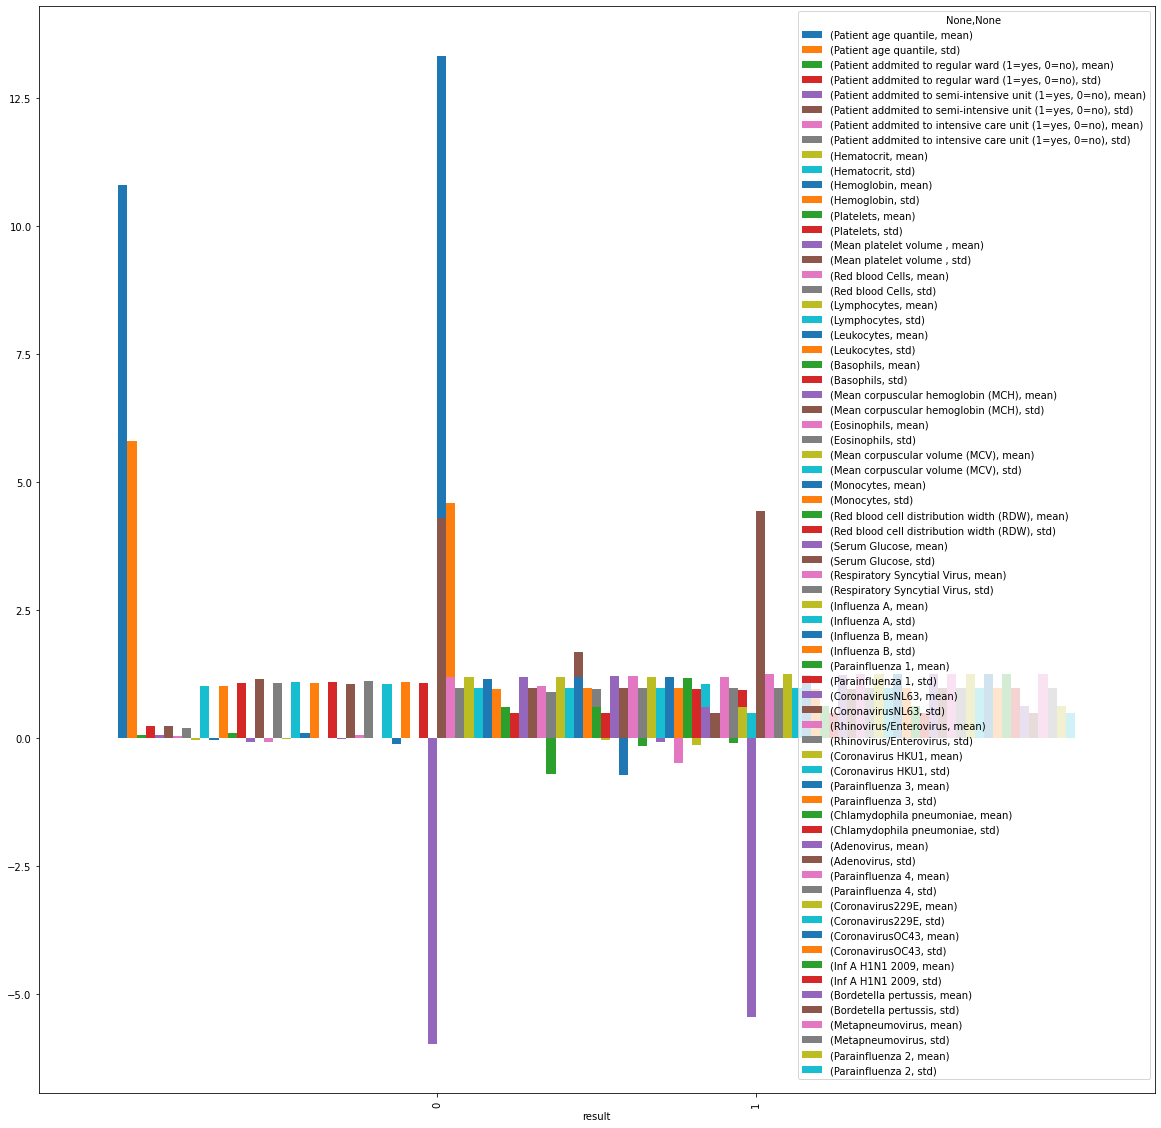

In [ ]:
aggs.plot.bar(figsize=(20,20),width=2)

## After Sampling

In [ ]:
df_negative = shuffle(df_negative)

In [ ]:
df_negative.head()

,Patient age quantile,result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2
613,4,0,0,0,0,-0.106813,-0.586244,-0.278739,-0.101517,0.384090,0.412185,-0.233750,0.081693,-1.703603,0.470813,-1.015552,-0.088928,0.259492,0.101628,1,2,2,1,2,2,2,2,1,2,2,2,2,2,1,2,1
110,0,0,0,0,1,-0.862136,-0.648900,1.630656,0.347255,-1.255533,2.928253,-0.431328,-0.529226,1.328151,1.566437,1.127610,1.014127,1.674795,-0.322355,2,2,2,1,2,2,2,2,1,2,2,2,2,2,1,2,1
3180,18,0,0,0,1,-0.381476,-0.398276,-0.416919,1.581381,0.366460,-0.662474,1.722553,-0.529226,-1.389973,-0.793368,-1.456201,-0.351560,0.701775,0.434757,2,2,2,1,2,2,2,2,1,2,2,2,2,2,1,2,1
2115,13,0,0,0,0,1.197836,0.980156,2.409489,-1.447836,0.754327,0.650998,0.214280,2.219906,0.282719,0.934346,0.546754,-0.587929,-0.005877,-9.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
333,10,0,0,0,0,0.808730,0.729532,0.512655,-0.101517,0.913001,0.207488,-0.500898,0.387152,-0.396813,-0.287696,-0.414665,-0.509139,-0.359703,-9.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_positive.shape

(83, 36)

In [ ]:
df_negative_83=df_negative[:83]

In [ ]:
df_negative_83.shape

(83, 36)

In [ ]:

twodf = [df_positive, df_negative_83]
edf = pd.concat(twodf, ignore_index=True)
edf = shuffle(edf)
edf.head()

,Patient age quantile,result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2
141,14,0,0,0,0,-1.342796,-1.338116,0.462408,-1.335643,-1.590510,-1.438617,-0.464722,-1.140144,0.700891,-0.835508,0.947345,-1.533404,-0.271247,-0.655484,2,2,2,1,2,2,2,2,1,2,2,2,2,2,1,2,1
126,13,0,0,0,0,0.740064,0.604220,-0.040064,-0.325903,0.895370,0.804521,-0.985104,1.608988,-0.605899,0.470813,-0.494784,-0.377823,0.171035,0.525610,2,2,2,1,2,2,2,2,1,2,2,2,2,2,1,2,1
132,14,0,0,0,0,-0.656139,-0.648900,-0.002379,0.796029,-0.726622,0.454830,0.690137,0.998070,0.178175,2.830618,0.266340,-0.535402,0.613318,-9.000000,2,2,2,1,2,2,2,2,1,2,2,2,2,2,1,2,1
148,7,0,0,0,0,-1.068133,-1.275460,0.638273,-1.447836,-0.726622,-0.210435,-0.261578,-0.223767,-1.024072,6.918138,-0.574902,-0.509139,0.259492,-9.000000,2,2,2,1,2,1,2,2,1,2,2,2,2,2,1,2,1
23,12,1,0,0,0,0.740064,0.854844,-1.484672,0.571643,0.489872,1.375967,-1.132592,-0.223767,0.544077,0.765789,0.286369,1.014127,-1.332725,-9.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
agg_ss = edf.groupby('result').agg(['mean', 'std'])
agg_ss

Patient age quantile            ... Parainfluenza 2          
                       mean       std  ...            mean       std
result                                 ...                          
0                 10.578313  5.543884  ...        0.722892  0.450291
1                 13.325301  4.588183  ...        0.626506  0.486672

[2 rows x 70 columns]

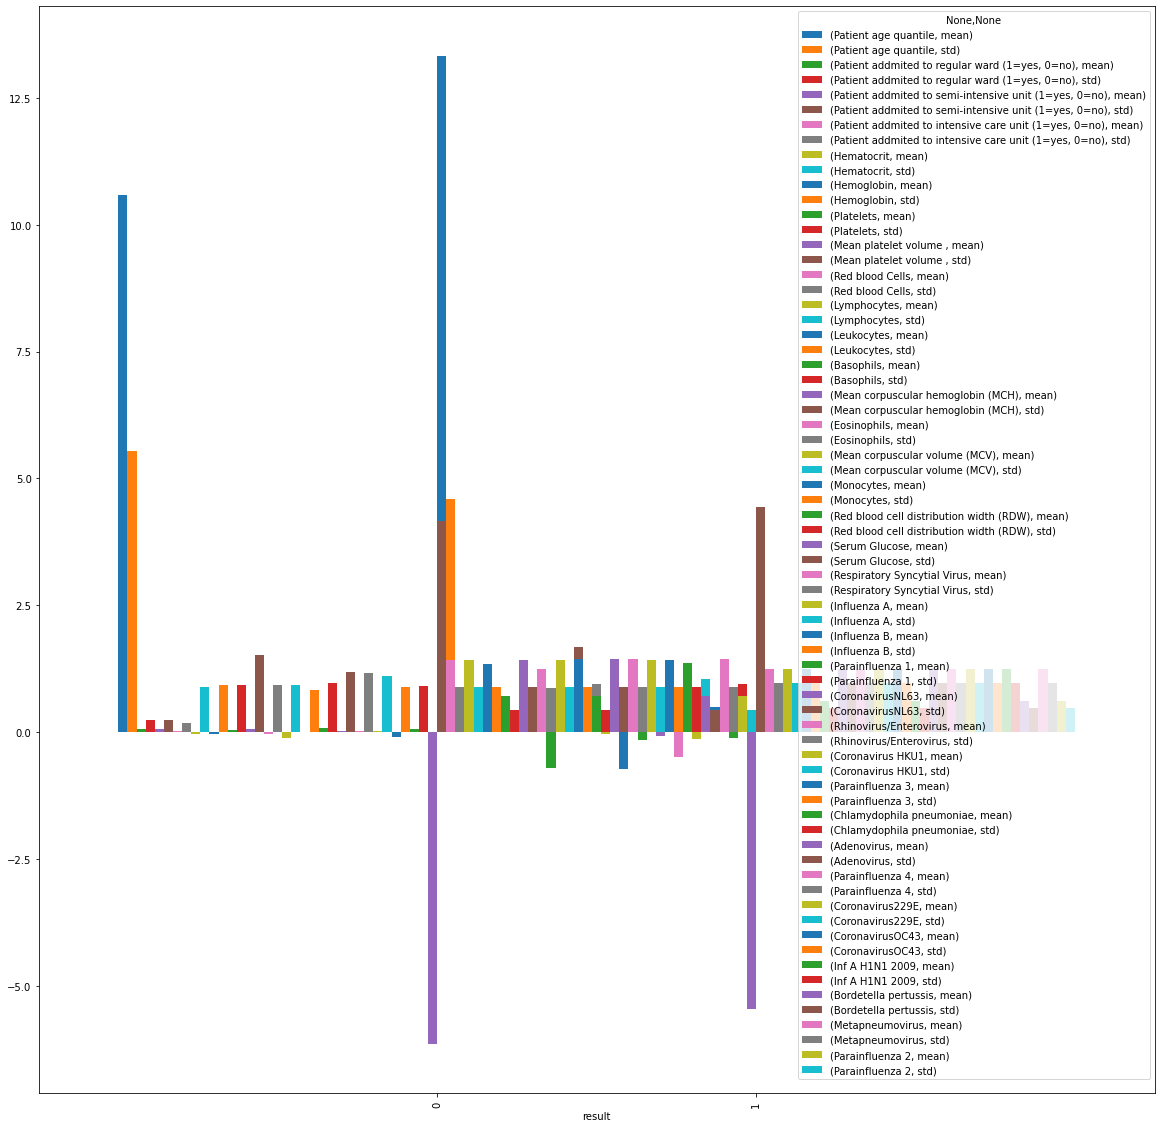

In [ ]:
agg_ss.plot.bar(figsize=(20,20),width=2)

## Now when I created a dataframe with manually shuffled rows, I will try my model again.

In [ ]:
Xsh = edf[['Patient age quantile', 'Patient addmited to regular ward (1=yes, 0=no)',
           'Patient addmited to semi-intensive unit (1=yes, 0=no)', 'Patient addmited to intensive care unit (1=yes, 0=no)',
           'Hematocrit', 'Hemoglobin', 'Platelets', 'Mean platelet volume ', 'Red blood Cells', 'Lymphocytes',
           'Leukocytes', 'Basophils', 'Mean corpuscular hemoglobin (MCH)', 'Eosinophils', 'Mean corpuscular volume (MCV)',
           'Monocytes', 'Red blood cell distribution width (RDW)', 'Serum Glucose', 'Respiratory Syncytial Virus', 'Influenza A', 'Influenza B', 'Parainfluenza 1', 
           'CoronavirusNL63', 'Rhinovirus/Enterovirus','Coronavirus HKU1', 'Parainfluenza 3', 'Chlamydophila pneumoniae', 'Adenovirus', 'Parainfluenza 4', 'Coronavirus229E', 'CoronavirusOC43' ,
           'Inf A H1N1 2009', 'Bordetella pertussis', 'Metapneumovirus', 'Parainfluenza 2']]
ysh= edf['result']

In [ ]:
Xsh_train, Xsh_test, ysh_train, ysh_test = train_test_split(Xsh, ysh, test_size=0.2, random_state=42)

In [ ]:

clf = XGBClassifier()
clf.fit(Xsh, ysh)

training_preds_ = clf.predict(Xsh_train)
test_preds_ = clf.predict(Xsh_test)

training_accuracy_ = accuracy_score(ysh_train, training_preds_)
test_accuracy_ = accuracy_score(ysh_test, test_preds_)

print('Training Accuracy: {:.4}%'.format(training_accuracy_ * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy_ * 100))
print(classification_report(ysh_test, test_preds_))
print(metrics.confusion_matrix(ysh_test, test_preds_))

Training Accuracy: 100.0%
Validation accuracy: 100.0%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        20

    accuracy                           1.00        34
   macro avg       1.00      1.00      1.00        34
weighted avg       1.00      1.00      1.00        34

[[14  0]
 [ 0 20]]


### Checking for linear independence

In [ ]:
#Checking for linear independence

correlation = df[['Patient age quantile', 'Patient addmited to regular ward (1=yes, 0=no)',
           'Patient addmited to semi-intensive unit (1=yes, 0=no)', 'Patient addmited to intensive care unit (1=yes, 0=no)',
           'Hematocrit', 'Hemoglobin', 'Platelets', 'Mean platelet volume ', 'Red blood Cells', 'Lymphocytes',
           'Leukocytes', 'Basophils', 'Mean corpuscular hemoglobin (MCH)', 'Eosinophils', 'Mean corpuscular volume (MCV)',
           'Monocytes', 'Red blood cell distribution width (RDW)', 'Serum Glucose', 'Respiratory Syncytial Virus', 'Influenza A', 'Influenza B', 'Parainfluenza 1', 
           'CoronavirusNL63', 'Rhinovirus/Enterovirus','Coronavirus HKU1', 'Parainfluenza 3', 'Chlamydophila pneumoniae', 'Adenovirus', 'Parainfluenza 4', 'Coronavirus229E', 'CoronavirusOC43' ,
           'Inf A H1N1 2009', 'Bordetella pertussis', 'Metapneumovirus', 'Parainfluenza 2']].corr()
correlation

,Patient age quantile,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose
Patient age quantile,1.000000,0.046166,0.015736,-0.035772,0.096808,0.060320,-0.158683,0.119449,-0.037510,-0.125935,-0.166386,0.107525,0.197394,0.022085,0.281655,0.050962,0.166429,0.215857
"Patient addmited to regular ward (1=yes, 0=no)",0.046166,1.000000,-0.011264,-0.010192,-0.087241,-0.091867,-0.183091,-0.013134,-0.053143,-0.095313,-0.103005,0.031833,-0.050703,-0.085636,-0.039326,-0.000354,0.102160,0.058746
"Patient addmited to semi-intensive unit (1=yes, 0=no)",0.015736,-0.011264,1.000000,-0.008087,-0.182215,-0.177142,0.006966,-0.023475,-0.137951,-0.110574,0.138304,-0.132984,-0.054479,-0.089780,-0.050871,-0.037916,0.092406,0.198328
"Patient addmited to intensive care unit (1=yes, 0=no)",-0.035772,-0.010192,-0.008087,1.000000,-0.183850,-0.178878,0.125953,-0.073511,-0.120659,-0.109867,0.271681,-0.121429,-0.090487,-0.088586,-0.078215,-0.103629,0.193560,0.123551
Hematocrit,0.096808,-0.087241,-0.182215,-0.183850,1.000000,0.968447,-0.082296,0.083580,0.872987,0.002035,-0.089937,0.129268,0.075216,0.029781,0.025161,0.082361,-0.264708,-0.133147
Hemoglobin,0.060320,-0.091867,-0.177142,-0.178878,0.968447,1.000000,-0.120150,0.078816,0.841420,-0.004105,-0.102375,0.116389,0.184883,0.018618,0.027679,0.094586,-0.342426,-0.152091
Platelets,-0.158683,-0.183091,0.006966,0.125953,-0.082296,-0.120150,1.000000,-0.356332,-0.054561,0.090607,0.443056,-0.025990,-0.101245,0.169453,-0.033844,-0.200660,-0.008222,-0.011247
Mean platelet volume,0.119449,-0.013134,-0.023475,-0.073511,0.083580,0.078816,-0.356332,1.000000,0.043419,0.079060,-0.154643,0.128630,0.069457,-0.046539,0.078026,0.038380,0.045468,0.062632
Red blood Cells,-0.037510,-0.053143,-0.137951,-0.120659,0.872987,0.841420,-0.054561,0.043419,1.000000,-0.009843,-0.036159,0.079362,-0.367077,-0.004408,-0.458531,0.045172,-0.138071,-0.036546
Lymphocytes,-0.125935,-0.095313,-0.110574,-0.109867,0.002035,-0.004105,0.090607,0.079060,-0.009843,1.000000,-0.330536,0.234675,0.014736,0.199562,0.026927,0.065313,-0.079711,-0.181544


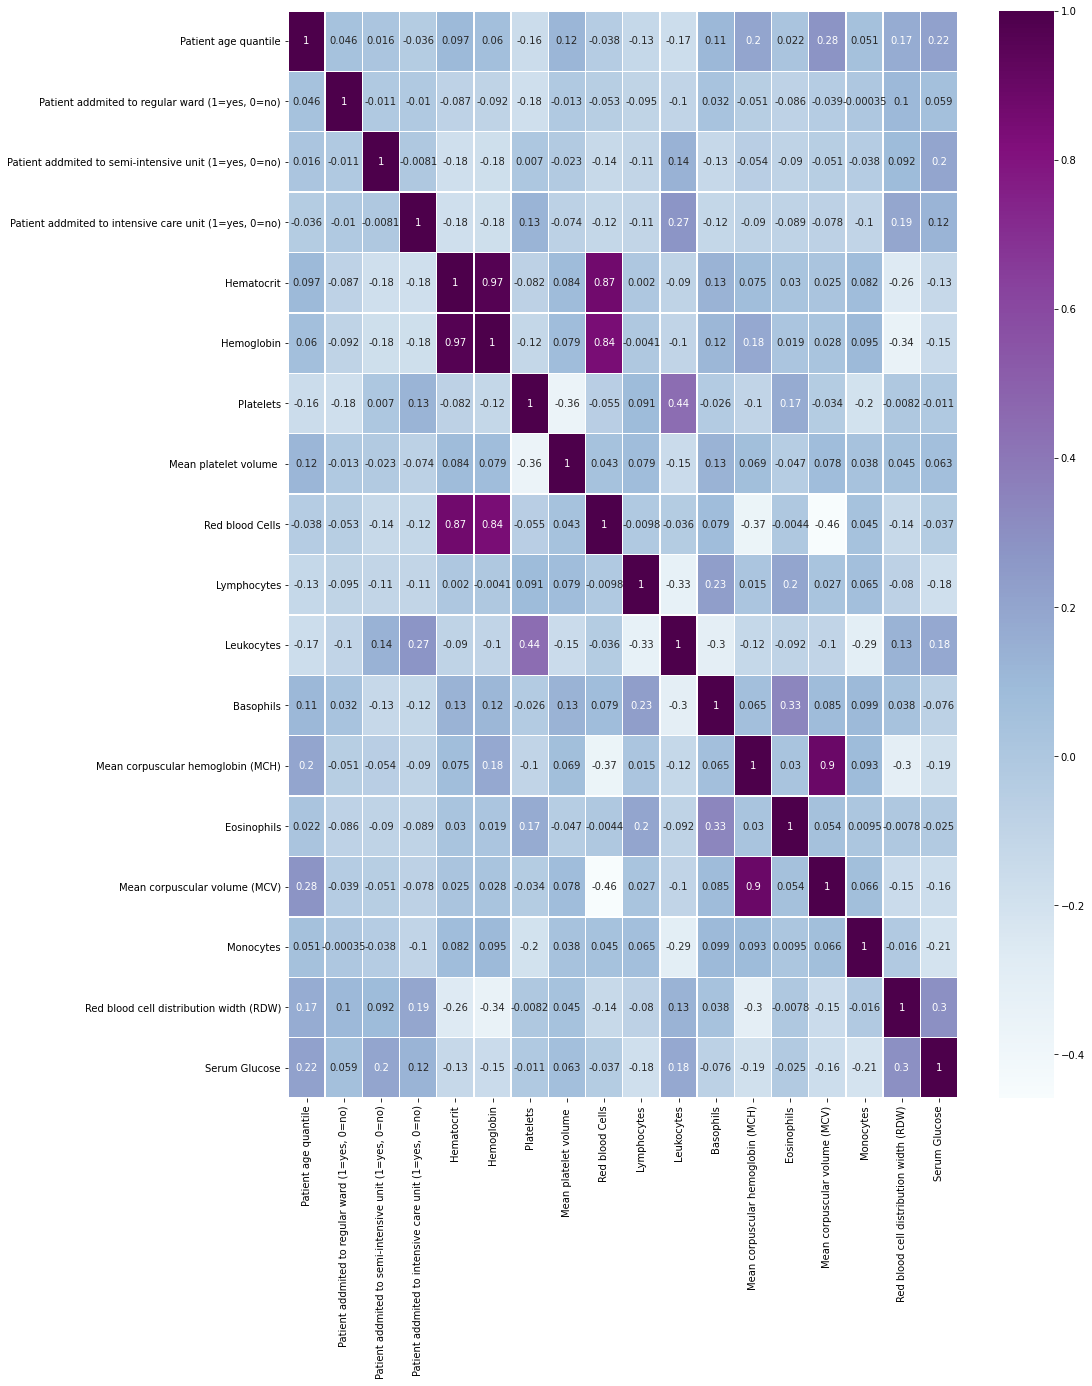

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,20))
sns.heatmap(correlation, annot=True, linewidths=.5, ax=ax,cmap='BuPu')


In [ ]:
from imblearn.over_sampling import ADASYN


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42)

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
X_train = X_train.values
X_test = X_test.values

In [ ]:
adasyan = ADASYN(sampling_strategy='minority')
X_ad, y_ad = smote.fit_sample(X_train, y_train)

In [ ]:
clf = XGBClassifier()
clf.fit(X_ad, y_ad)

training_preds = clf.predict(X_train)
test_preds = clf.predict(X_test)

training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))

Training Accuracy: 98.89%
Validation accuracy: 88.74%


In [ ]:
np.count_nonzero(y_ad == 1),np.count_nonzero(y_ad == 0)

(389, 389)

In [ ]:

print('True:     ', y_test.values[0:25])
print('Predicted:', test_preds[0:25])

True:      [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
Predicted: [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]


In [ ]:
print(metrics.recall_score(y_test, test_preds))

0.6


In [ ]:
print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93       131
           1       0.57      0.60      0.59        20

    accuracy                           0.89       151
   macro avg       0.75      0.77      0.76       151
weighted avg       0.89      0.89      0.89       151



## XG-Boost with different sampling methods

In [ ]:
data = {'XG-Boost':['Shuffling Undersampling','Random Undersampling','Random Oversampling','SMOTETomek','ADASYN','SMOTE','Tomek',],
		'Train Accuracy':[100,100,98.21,97.12,98.89,98.45,98.89],
    'Test Accuracy':[100,100,97.31,96.69,88.74,88.08,88.08]}


xg = pd.DataFrame(data)

xg


,XG-Boost,Train Accuracy,Test Accuracy
0,Shuffling Undersampling,100.00,100.00
1,Random Undersampling,100.00,100.00
2,Random Oversampling,98.21,97.31
3,SMOTETomek,97.12,96.69
4,ADASYN,98.89,88.74
5,SMOTE,98.45,88.08
6,Tomek,98.89,88.08
